## 3 Linear Models: AUROC

![An example of ROC Curve][1]

[1]: roc-rurve.png

An unbiased estimate of Area Under Receive-Operating Curve (AUROC) is

$$
    AUROC(a) = \frac{1}{|\mathcal{D}_0| |\mathcal{D}_1|} \sum_{x_0 \in D_0} \sum_{x_1 \in D_1} I[a(x_0) < a(x_1)] .
$$

for an algorithm $a$, $\mathcal{D}_{0,1}$ mean a set of negative (0) and positive (1) examples. It is useful since

* Threshold Independence
* Robustness to Class Imbalance
* Model Comparison
* Interpretability
* ...

### Dataset

Let's generate some synthetic 2d dataset for classification problem.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rs = np.random.RandomState(42)

In [3]:
n_points = 200
clusters = [
    rs.normal(loc=(1, 1), size=(n_points // 2, 2)),
    rs.normal(loc=(-1, -1), size=(n_points // 2, 2)),
]
coords = np.vstack(clusters)
labels = np.zeros(n_points, dtype=int)
labels[n_points // 2:] += 1

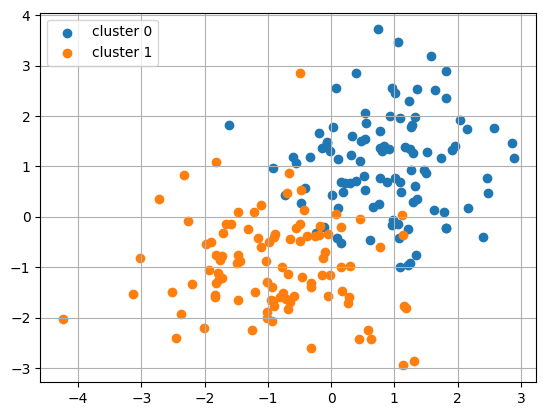

In [4]:
for i, cluster in enumerate(clusters):
    plt.scatter(clusters[i][:, 0], clusters[i][:, 1], label=f'cluster {i}')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
clf = LogisticRegression()
clf.fit(coords, labels)
probas = clf.predict_proba(coords)

### Confusion Matrix

Consusion matrix for a binary classifier is

$$
    C = \begin{bmatrix}
        TP & FP \\
        FN & TN
    \end{bmatrix}.
$$

Then let's define false-positive rate (FPR) and true-positive rate (TPR) as follows
$$
FPR = \frac{FP}{TP + TN},
$$
$$
TPR = \frac{TP}{TP + FN}.
$$

Receiver-Operation Curve (ROC) is a relation between TPR and FPR

$$
    TPR= TPR(FPR).
$$

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
threshold = 0.5
preds = (probas[:, 1] >= threshold).astype(int)

In [9]:
confmat = confusion_matrix(labels, preds)
tn, fp, fn, tp  = confmat.ravel()

In [10]:
fpr = fp / (fp + tn)
fpr

0.06

In [11]:
tpr = tp / (tp + fn)
tpr

0.92

### ROC and Area under ROC

We need to change a threshold contiously from 0 to 1, calculate confusion matrix, calculate tpr/fpr, and plot ROC and calculate AUROC.

In [12]:
# thresholds = (0, 0.5, 1)
thresholds = np.linspace(0, 1, 101)

fprs = np.empty(len(thresholds))
tprs = np.empty(len(thresholds))
for i, threshold in enumerate(thresholds):
    preds = (probas[:, 0] <= threshold).astype(int)

    confmat = confusion_matrix(labels, preds)
    tn, fp, fn, tp  = confmat.ravel()

    fprs[i] = fp / (fp + tn)
    tprs[i] = tp / (tp + fn)

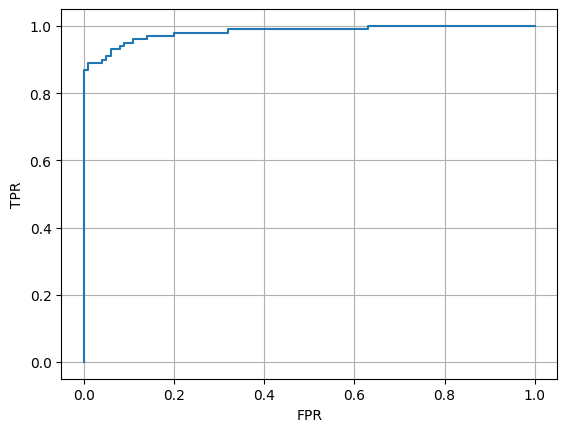

In [13]:
plt.step(fprs, tprs, '-')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

If we intergrate numerical over `tprs`/`fprs` then the value of that integral is an area under curve (i.e. AUROC).

In [14]:
np.trapz(tprs, fprs)

0.9798

Great! Let's compare with library implementation.

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

In [16]:
roc_auc_score(labels, probas[:, 1])

0.9815999999999999

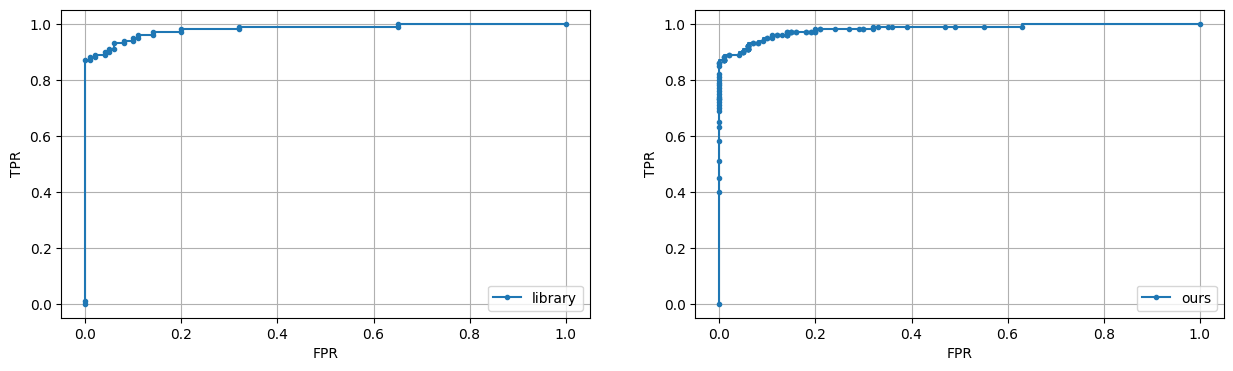

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

fpr, tpr, th = roc_curve(labels, probas[:, 1])
ax = axs[0]
ax.plot(fpr, tpr, '.-', label='library')
ax.legend()
ax.grid(True)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

ax = axs[1]
ax.step(fprs, tprs, '.-', label='ours')
ax.legend()
ax.grid(True)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

plt.show()